In [ ]:
# our objective is to visualize the data properly and find ways in which we can present some conclusion
# we can use various methods as we needs and visualizations is a must have

In [1]:
!nvidia-smi

Sat Jun 14 07:58:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [4]:
import cudf
import cuml

print("cudf version:", cudf.__version__)
print("cuml version:", cuml.__version__)

cudf version: 25.02.02
cuml version: 25.02.01


In [6]:
# lets load the data
data = cudf.read_csv('/kaggle/input/health-insurance-data-set/1651277648862_healthinsurance.csv')
if data is None:
    raise ValueError("Failed to load data. Please check the file path and format.")
else:
    print("Data loaded successfully!")

Data loaded successfully!


In [7]:
data

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [8]:
# check the data types and info
data.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  14604 non-null  int64
 1   sex                  15000 non-null  object
 2   weight               15000 non-null  int64
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object
 5   no_of_dependents     15000 non-null  int64
 6   smoker               15000 non-null  int64
 7   city                 15000 non-null  object
 8   bloodpressure        15000 non-null  int64
 9   diabetes             15000 non-null  int64
 10  regular_ex           15000 non-null  int64
 11  job_title            15000 non-null  object
 12  claim                15000 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 1.7+ MB


In [9]:
# Description of the data such as central tendency, dispersion, and shape of the dataset's distribution
data.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [ ]:
# we have a incomplete data set as we can check from the counts of the age, bmi
data.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [33]:
numeric_columns = data.select_dtypes(include=['float','int']).columns.tolist()

for c in numeric_columns:
    mean_value = data[c].mean()
    data[c].fillna(mean_value, inplace=True)

correlation_matrix = data[numeric_columns].corr()
correlation_matrix

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
age,1.000000,0.280837,0.180246,0.058414,-0.019281,-0.008426,0.069683,0.008541,0.298707
weight,0.280837,1.000000,0.243269,0.135687,0.015499,-0.020835,-0.010490,-0.005578,0.077716
bmi,0.180246,0.243269,1.000000,0.049704,0.022802,-0.040066,0.079066,-0.037920,0.197939
no_of_dependents,0.058414,0.135687,0.049704,1.000000,0.008364,0.024849,0.065182,-0.010302,0.067614
smoker,-0.019281,0.015499,0.022802,0.008364,1.000000,0.005709,0.058164,-0.036949,0.773399
bloodpressure,-0.008426,-0.020835,-0.040066,0.024849,0.005709,1.000000,-0.016498,0.042493,0.013742
diabetes,0.069683,-0.010490,0.079066,0.065182,0.058164,-0.016498,1.000000,0.007960,0.135371
regular_ex,0.008541,-0.005578,-0.037920,-0.010302,-0.036949,0.042493,0.007960,1.000000,-0.060492
claim,0.298707,0.077716,0.197939,0.067614,0.773399,0.013742,0.135371,-0.060492,1.000000


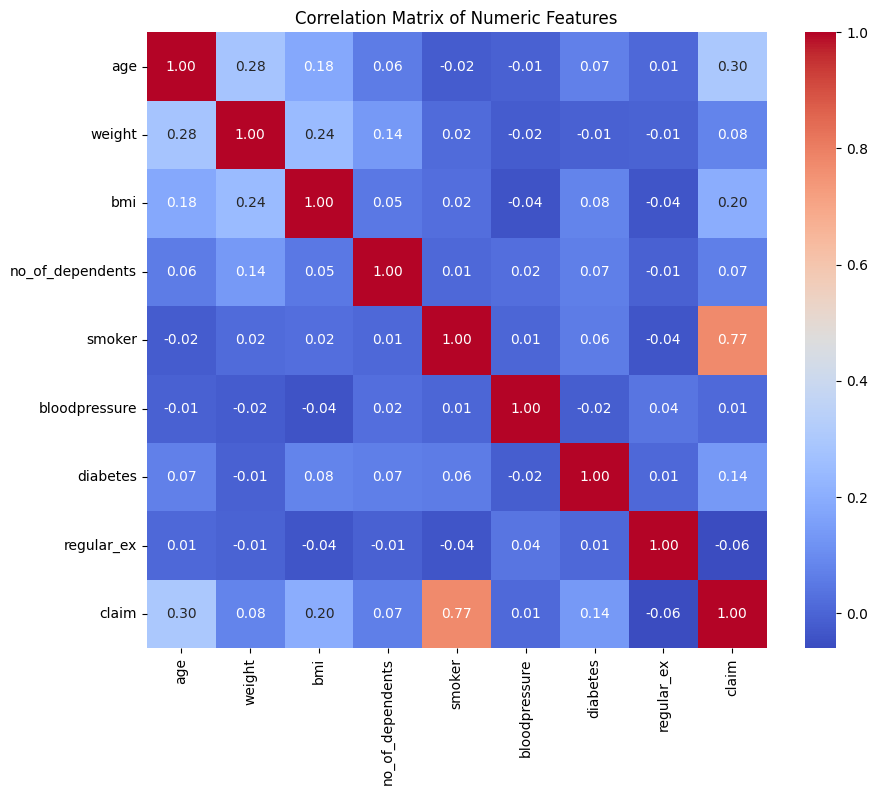

In [35]:
# hence we need to decide on what we are going to do with the missing values
# we can drop the rows with missing values
# or we can fill the missing values with the mean or median of the column
# here we will fill the missing values with the mean of the column
# first lets check the dependency of the columns with each other

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Fill missing values in numeric columns using mean
for column in numeric_columns:
    mean_value = data[column].mean()
    data[column] = data[column].fillna(mean_value)

# Step 3: Compute correlation only on numeric columns
correlation_matrix = data[numeric_columns].corr()

# Step 4: Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_pandas(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

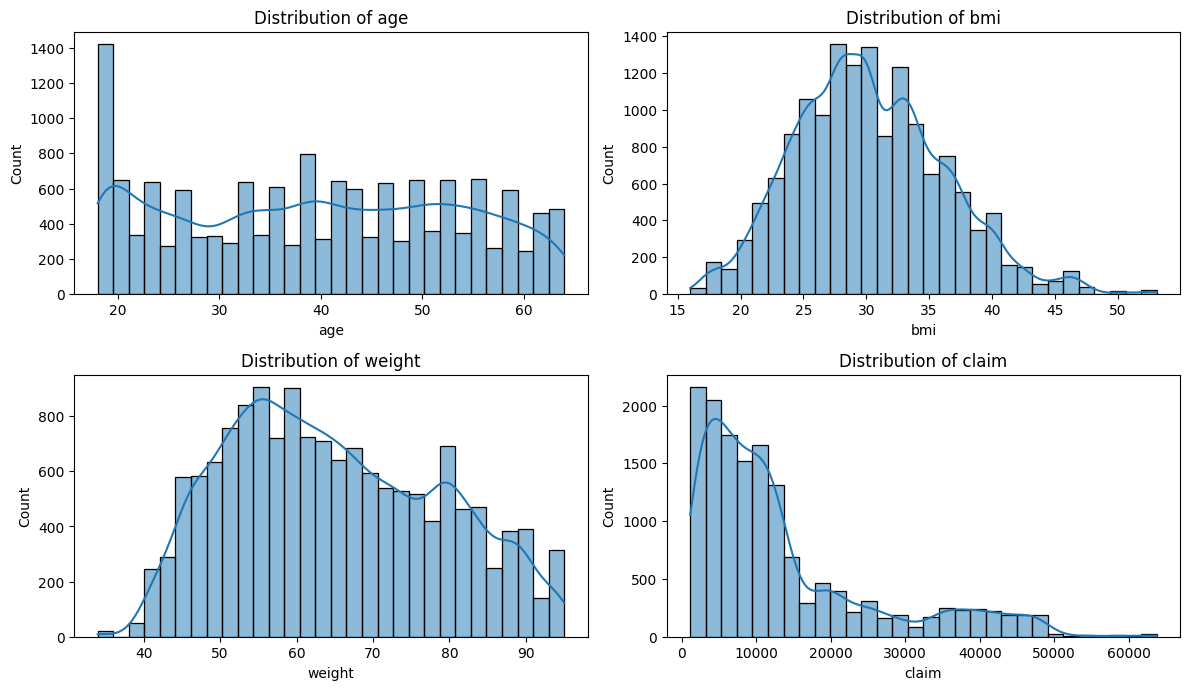

In [40]:
# Step 5: Plot distributions of key numeric features
plt.figure(figsize=(12, 10))
important_features = ['age', 'bmi', 'weight', 'claim']

for i, feature in enumerate(important_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[feature].to_pandas(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# we have to decide on what we are going to do with the columns like weight, age, bmi, claim(normalize or standardize)
# we will check them using visualization
